In [1]:
%matplotlib inline


# Color Quantization using K-Means

Performs a pixel-wise Vector Quantization (VQ) of an image reducing the number of colors required to show the image to 12 
unique colors, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to
find 12 color clusters. In the image processing literature, the codebook
obtained from K-means (the cluster centers) is called the color palette. Using
a single byte, up to 256 colors can be addressed, whereas an RGB encoding
requires 3 bytes per pixel. The GIF file format, for example, uses such a
palette.


In [2]:
!ls 

palette.jpg                   testimage2.png
palette.png                   testimage3.PNG
plot_color_quantization.ipynb


In [3]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import cv2

Automatically created module for IPython interactive environment


In [4]:
n_colors = 12

# Load the palette
palette = cv2.imread("palette.jpg")
palette = cv2.cvtColor(palette, cv2.COLOR_BGR2RGB)

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
palette = np.array(palette, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(palette.shape)
assert d == 3
palette_array = np.reshape(palette, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
#im_array_sample = shuffle(palette_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(palette_array)
print("done in %0.3fs." % (time() - t0))



Fitting model on a small sub-sample of the data
done in 1.119s.


In [5]:
#save palette colors as clusters
codebook_palette = kmeans.cluster_centers_

In [6]:
image = cv2.imread("testimage2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#palette = cv2.imread("palette.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
#image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 4.341s.
Predicting color indices on the full image (k-means)
done in 0.011s.


done in 0.073s.


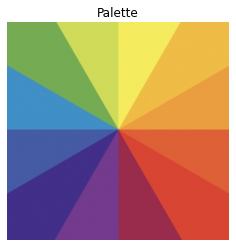

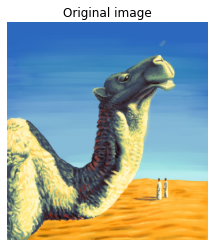

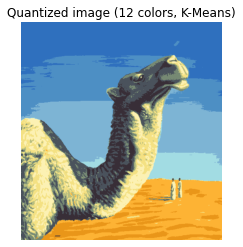

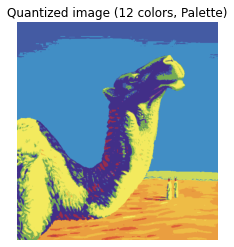

In [7]:
t0 = time()
labels_palette = pairwise_distances_argmin(codebook_palette,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(0)
plt.clf()
plt.axis('off')
plt.title('Palette')
plt.imshow(palette)

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (12 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (12 colors, Palette)')
plt.imshow(recreate_image(codebook_palette, labels_palette, w, h))
plt.show()